In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

In [2]:
census = pd.read_csv('data/combined_cleaned_encode.csv')
census.head()

,zipcode,total_crimes,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,crime rate,crime rating,crime encode
0,85746.0,29633.0,42704.0,31.8,41427.0,16176.0,10686.0,25.023417,0.693916,high,2.0
1,85706.0,38102.0,56989.0,27.5,29814.0,12164.0,20916.0,36.701820,0.668585,high,2.0
2,85756.0,8557.0,35522.0,31.8,46672.0,16574.0,5229.0,14.720455,0.240893,high,2.0
3,85747.0,4670.0,23490.0,34.5,81474.0,31039.0,1199.0,5.104300,0.198808,high,2.0
4,85748.0,2971.0,18275.0,45.4,69871.0,34353.0,1254.0,6.861833,0.162572,high,2.0


In [3]:
census.shape

(440, 11)

In [4]:
print(list(census.head(0)))

['zipcode', 'total_crimes', 'Population', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate', 'crime rate', 'crime rating', 'crime encode']


In [5]:
for index, row in census.iterrows():
    if(row['crime rating'] == "high"):
        blah = 2
    elif(row['crime rating'] == 'medium'):
        blah = 1
    else:
        blah = 0
    census.at[index, 'encode'] = blah
census.head()

,zipcode,total_crimes,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,crime rate,crime rating,crime encode,encode
0,85746.0,29633.0,42704.0,31.8,41427.0,16176.0,10686.0,25.023417,0.693916,high,2.0,2.0
1,85706.0,38102.0,56989.0,27.5,29814.0,12164.0,20916.0,36.701820,0.668585,high,2.0,2.0
2,85756.0,8557.0,35522.0,31.8,46672.0,16574.0,5229.0,14.720455,0.240893,high,2.0,2.0
3,85747.0,4670.0,23490.0,34.5,81474.0,31039.0,1199.0,5.104300,0.198808,high,2.0,2.0
4,85748.0,2971.0,18275.0,45.4,69871.0,34353.0,1254.0,6.861833,0.162572,high,2.0,2.0


In [6]:
target = census["encode"]
target_names = ["Low", "High"]
#split into low and high because model doesn't handle 3 classes well with our data

In [7]:
#data = census.drop(["crime_rating", "encode"], axis=1)
data = census[["Per Capita Income", "crime rate"]]
feature_names = data.columns
data.head()

,Per Capita Income,crime rate
0,16176.0,0.693916
1,12164.0,0.668585
2,16574.0,0.240893
3,31039.0,0.198808
4,34353.0,0.162572


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.291


In [11]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

        Low       0.18      0.24      0.21        33
       High       0.32      0.23      0.27        35

avg / total       0.31      0.29      0.29       110



C:\Users\thats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 3, does not match size of target_names, 2
  .format(len(labels), len(target_names))


In [12]:
X = np.array(census[["Per Capita Income", "crime rate"]])
y = np.array(census["encode"])


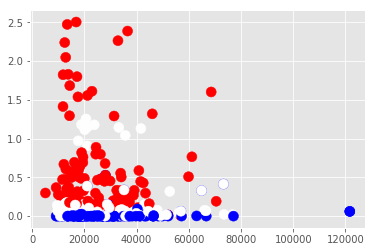

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [14]:
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

ValueError: cannot reshape array of size 1049049 into shape (116561,3)